In [1]:
pip install folium==0.12.1

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import os
import requests
import pprint
import json

서울시 장애인 인구 수 그래프

In [3]:
disabilities_df = pd.read_excel('./장애인+현황(장애유형별).xlsx')

# '소계' 인덱스 행을 찾아 해당 데이터를 추출합니다.
# '소계'가 '자치구별(2)' 열에 있는 행을 찾습니다.
subtotal_row = disabilities_df[disabilities_df['자치구별(2)'] == '소계']

disability_types = ['지체', '뇌병변', '시각', '청각', '언어', '지적장애', '자폐성', 
                    '정신장애', '신장장애', '심장장애', '호흡기', '간', '안면', 
                    '장루요루', '뇌전증']

# 장애 유형별 '계' 값을 담을 딕셔너리
disability_counts = {}

# 장애 유형별로 '계' 값을 추출
for dtype in disability_types:
    # 해당 장애 유형의 '계' 값
    dtype_col = disabilities_df.columns[(disabilities_df.iloc[1] == dtype) & (disabilities_df.iloc[2] == '계')]
    if not dtype_col.empty:  # 해당하는 열이 있을 경우 값 추출
        disability_counts[dtype] = subtotal_row[dtype_col].values[0]

# 추출된 장애 유형별 '계' 값을 확인
disability_counts

FileNotFoundError: [Errno 2] No such file or directory: './장애인+현황(장애유형별).xlsx'

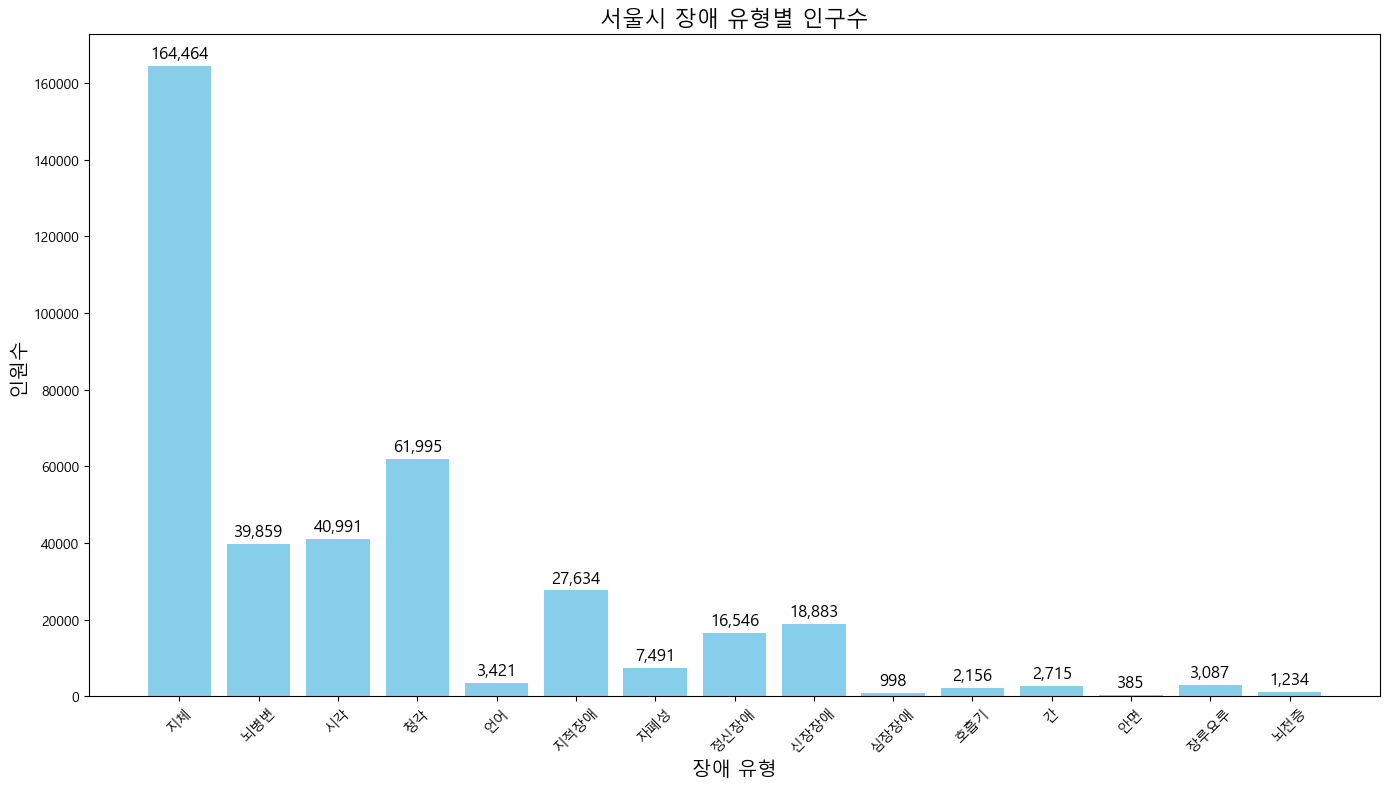

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'


# 추출된 데이터를 바탕으로 막대 그래프를 생성
fig, ax = plt.subplots(figsize=(14, 8))

# 장애 유형과 해당 '계' 값 리스트 생성
disability_types = list(disability_counts.keys())
counts = [int(count) for count in disability_counts.values()]

# 막대 그래프 생성
ax.bar(disability_types, counts, color='skyblue')

# 제목 및 레이블 추가
ax.set_title('서울시 장애 유형별 인구수', fontsize=16)
ax.set_xlabel('장애 유형', fontsize=14)
ax.set_ylabel('인원수', fontsize=14)

# 각 막대에 값 표시
for i, count in enumerate(counts):
    ax.text(i, count + 1000, f'{count:,}', ha='center', va='bottom', fontsize=12)

# 그래프 표시
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()  # 레이아웃 조정

plt.show()

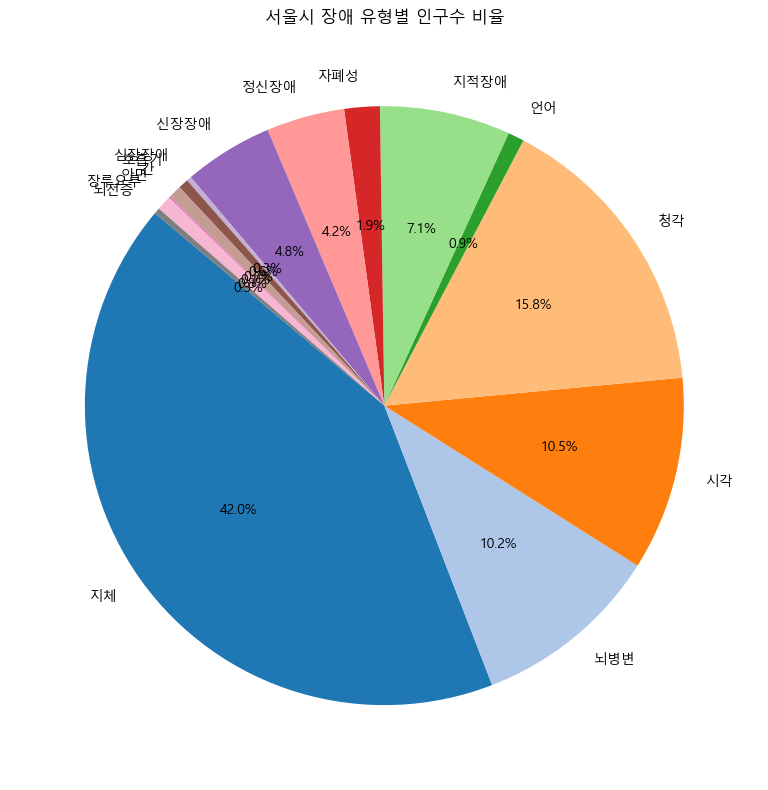

In [ ]:
import matplotlib.pyplot as plt

# 장애 유형별 인구수 데이터를 파이 차트로 시각화
fig, ax = plt.subplots(figsize=(10, 8))

# 파이 차트에 사용할 값과 레이블 설정
values = [count[0] for count in disability_counts.values()]
labels = list(disability_counts.keys())

# 파이 차트 생성
ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
ax.set_title('서울시 장애 유형별 인구수 비율')

# 파이 차트 표시
plt.tight_layout()
plt.show()


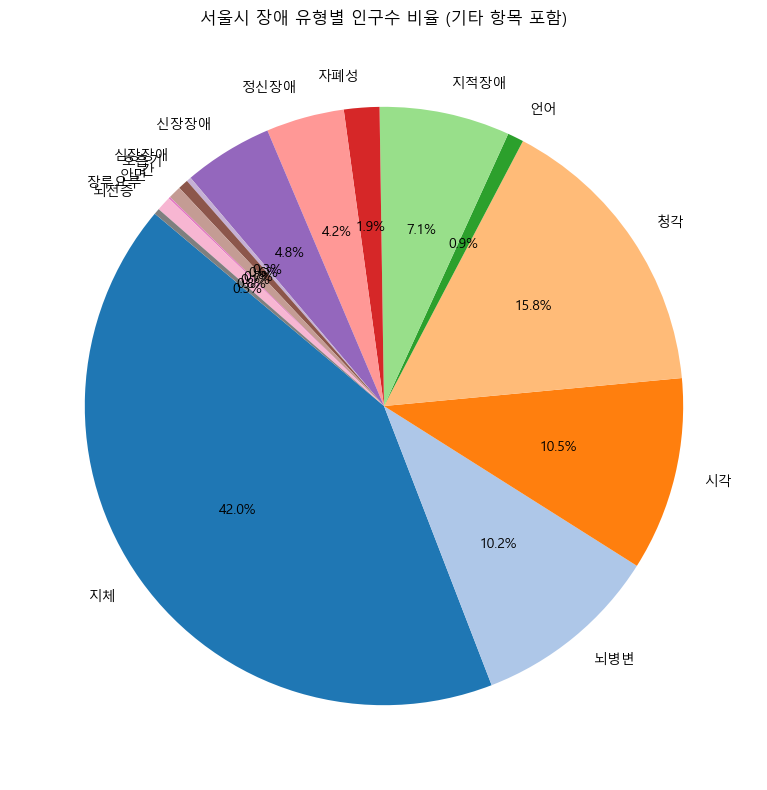

In [ ]:
# 기존에 추가한 '기타' 카운트는 int 타입으로 추가되었으므로 이전 오류를 수정합니다.

# 파이 차트에 사용할 값과 레이블 설정 (수정)
values = [count if isinstance(count, int) else count[0] for count in disability_counts.values()]  # 수정된 부분
labels = list(disability_counts.keys())

# 수정된 파이 차트 생성
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
ax.set_title('서울시 장애 유형별 인구수 비율 (기타 항목 포함)')

plt.tight_layout()
plt.show()